In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [3]:
df=pd.read_csv("train.csv")
predection=pd.read_csv("test.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
predection.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train, test=train_test_split(df, test_size=0.3,random_state=11)

In [49]:
train.shape

(623, 12)

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            116
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          477
Embarked         2
dtype: int64

In [51]:
age_mean=train["Age"].mean()
age_mean

29.413214990138066

In [52]:
def master_function(frame):
    frame["Age"].fillna(age_mean, inplace = True, axis = 0)
    frame.drop(["PassengerId", "Name", "Ticket", "Cabin"], inplace = True, axis = 1)
    frame["Embarked"].fillna("S", inplace  = True, axis = 0)
    frame["Sex"] = frame["Sex"].map({"female":1, "male":0})
    frame["Embarked"] = frame["Embarked"].map({"S":1, "C":2, "Q":3})

In [53]:
master_function(train)

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
503,0,3,1,37.000000,0,0,9.5875,1
74,1,3,0,32.000000,0,0,56.4958,1
300,1,3,1,29.413215,0,0,7.7500,3
658,0,2,0,23.000000,0,0,13.0000,1
461,0,3,0,34.000000,0,0,8.0500,1


In [55]:
master_function(test)

In [56]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
431,1,3,1,29.413215,1,0,16.1000,1
821,1,3,0,27.000000,0,0,8.6625,1
629,0,3,0,29.413215,0,0,7.7333,3
626,0,2,0,57.000000,0,0,12.3500,3
665,0,2,0,32.000000,2,0,73.5000,1


In [57]:
def x_and_y(frame):
    inde=frame.drop("Survived", axis=1)
    target=frame["Survived"]
    return inde, target

x_train, y_train= x_and_y(train)
x_test, y_test= x_and_y(test)

#### generate a model: x_train with y_train
#### model testing:  x_test and y_test

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
test_prediction = model.predict(x_test)
score = accuracy_score(y_test, test_prediction)
print(score)

0.835820895522388


In [60]:
train_prediction = model.predict(x_train)
train_score = accuracy_score(y_train, train_prediction)
print(train_score)

0.7817014446227929


In [61]:
master_function(predection)

In [62]:
predection.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [63]:
predection.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [64]:
predection.dropna(axis = 0, inplace = True)

In [65]:
answer = model.predict(predection)
predection["Survived"] = answer

In [66]:
predection.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,34.5,0,0,7.8292,3,0
1,3,1,47.0,1,0,7.0000,1,0
2,2,0,62.0,0,0,9.6875,3,0
3,3,0,27.0,0,0,8.6625,1,0
4,3,1,22.0,1,1,12.2875,1,1


In [67]:
y_hat=model.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,classification_report
test_score= accuracy_score(y_test,y_hat)
print(test_score)

0.835820895522388


####  Checking score on train set

In [69]:
train_answers=model.predict(x_train)
train_score=accuracy_score(y_train,model.predict(x_train))
print(train_score)

0.7817014446227929


In [70]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [71]:
test_confusion_score=confusion_matrix(y_test,y_hat)
train_confusion_score= confusion_matrix(y_train,model.predict(x_train))

In [72]:
print("\nConfusion matrix of train:\n", train_confusion_score)
print("\nConfusion matrix of test:\n", test_confusion_score)


Confusion matrix of train:
 [[309  64]
 [ 72 178]]

Confusion matrix of test:
 [[155  21]
 [ 23  69]]


In [73]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_hat))

0.7666666666666667


### TPR = (Tp)/(Tp+FN)

### FPR = FP/(FP+TN)

In [74]:
test_proba = model.predict_proba(x_test)
test_proba = test_proba[:,1]

#### To Choose the threshold 

In [75]:
from sklearn.metrics import roc_curve, auc 
fpr, tpr, threshold = roc_curve(y_test, test_proba)

In [76]:
area = auc(fpr, tpr)

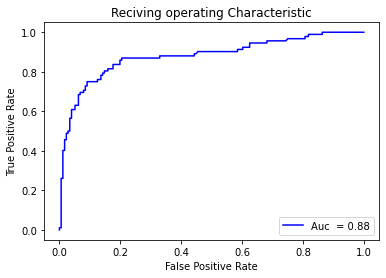

In [77]:
import matplotlib.pyplot as plt
plt.title("Reciving operating Characteristic")
plt.plot(fpr, tpr, "b", label = "Auc  = %0.2f"% area)
plt.legend(loc = "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [78]:
data = pd.DataFrame({"Fpr":fpr, "TPR":tpr, "Thres":threshold})

In [79]:
data[data["Fpr"]>=0.44]

,Fpr,TPR,Thres
53,0.443182,0.880435,0.150351
54,0.443182,0.891304,0.149599
55,0.448864,0.891304,0.147637
56,0.454545,0.902174,0.147620
57,0.568182,0.902174,0.125682
58,0.585227,0.902174,0.125681
59,0.585227,0.913043,0.125415
60,0.602273,0.913043,0.122571
61,0.602273,0.923913,0.122373
62,0.625000,0.923913,0.116372


In [80]:
data = data.round(2)

In [81]:
data.head()

,Fpr,TPR,Thres
0,0.00,0.00,1.97
1,0.00,0.01,0.97
2,0.01,0.01,0.97
3,0.01,0.03,0.95
4,0.01,0.05,0.95


In [82]:
classes = []
for proba in test_proba:
    if proba>=0.26:
        classes.append(1)
    else:
        classes.append(0)

In [83]:
x_test["Prediction"] = classes 

In [84]:
x_test["Orignal"]  = y_test

In [85]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prediction,Orignal
431,3,1,29.413215,1,0,16.1000,1,1,1
821,3,0,27.000000,0,0,8.6625,1,0,1
629,3,0,29.413215,0,0,7.7333,3,0,0
626,2,0,57.000000,0,0,12.3500,3,0,0
665,2,0,32.000000,2,0,73.5000,1,0,0


In [87]:
accuracy_score(x_test["Orignal"], x_test["Prediction"])

0.7723880597014925

In [88]:
pickle.dump(model, open('TitanicModel.pkl', 'wb'))